# Lab Overview

## Introduction
- Assume a neural network composed of three layers of neurons: input layer, hidden layer and output layer. We wish to train this network so when it is presented with a specific input it will have a certain output.
- For this lab we are going to work with the [MNIST database of handwritten digits](http://yann.lecun.com/exdb/mnist) and train our network to recognise handwritten 0-9 digits. The MNIST database contains 60000 images which can used to train the network and 10000 more images for testing purposes. Each image is an  matrix representing a digit.

<img src="Lab1_NetworkScheme.jpg" width="800" height="600">

## The neural network

### Network initialisation


1. Generate a set of weights between the input and the hidden layer. The input layer should have 784 neurons, one for each pixel of the image.

2. Generate a set of weights between the hidden and the output layer. The output layer should have 10 neurons, one for each digit.

3. Generate two sets of bias, one for the hidden layer and one for the output layer. Bias is set to 0 to start with 


### Feedforward


1. Feed an image $\vec{x(\mu)}$ to the network,
   

2. Compute the input to each of the neurons of the hidden layer, $h^{(1)}_i = \sum_{i=1}^{784}w^{(1)}_{ij} x^{(0)}_j + b^{(1)}_i$ and their outputs with the use of the [sigmoid function](http://mathworld.wolfram.com/SigmoidFunction.html),$x^{(1)}_i = f(h^{(1)}_i) = \frac{1}{(1+e^{-h^{(1)}_i})}$.

3. Repeat for the output layer, $h^{(2)}_i = \sum_{i=1}^{784}w^{(2)}_{ij} x^{(1)}_j + b^{(2)}_i$ and their outputs, $x^{(2)}_i = f(h^{(2)}_i)$

<img src="nn2.jpg"  width="800" height="600">


### Error

1. Calculate the error in the output of the neural network. If the input is an image of a zero digit it is expected that the first neuron of the input layer to be fully active, i.e has an output of 1, while the other neurons have outputs of 0. Thus the target output would be $t = [1,0,0,\dots,0]^T$ and, given that the output of the neural network is some $output$, the error is given by the formula $$E(\mu) = \sum_{i=1}^{n}\frac{1}{2}(t_i(\mu)-x^{(2)}_i(\mu))^2,$$ where $n$ is the number of neurons in the output layer of the network and $\mu$ is sample index. The total error per sample is then given by $$E/N = \sum_{\mu=1}^N \sum_{i=1}^{n}\frac{1}{2N}(t_i(\mu)-x^{(2)}_i(\mu))^2.$$



### Backpropagation
Here we will consider explicitly the logistic sigmoid activation function so we can use the result that the derivative of the logistic sigmoid is
$$ f'(h) = \frac{\partial f(h) }{\partial h } = f(h)(1-f(h)) $$ directly in the update rules.

1. Apply the delta rule between the output and the hidden layers. For the weight $w_{ij}$ we have 

$$\frac{\partial E}{\partial w_{\textrm{ij}} }=\frac{\partial E}{\partial x^{(2)}_i }\;\frac{\partial x^{(2)}_i }{\partial h^{(2)}_i } \; \frac{\partial h^{(2)}_i }{\partial w_{\textrm{ij}} } \; =-\left( t_i -x^{(2)}_i \right)\; x^{(2)}_i \;\left(1-x^{(2)}_i \right) \; x^{(1)}_j,$$ 

and we can define  $\delta^{(2)}_i = \left(t_i - x^{(2)}_i \right)x^{(2)}_i \;\left(1-x^{(2)}_i \right) $.

2. Update the weights between the hidden and the output layers.  For the weight $w_{ij}$ we have the update after a single input $${\Delta w}_{\textrm{ij}} = \eta \delta^{(2)}_i x^{(1)}_j.$$

3. Repeat steps 1 and 2 between the hidden and the input layes and update the weights between them. Here for the weight $w_{ij}$ we have 
$$\frac{\partial E}{\partial w_{\textrm{ij}} }=\frac{\partial E}{\partial x^{(1)}_j }\;\frac{\partial x^{(1)}_j }{\partial h^{(1)}_j }\;\frac{\partial h^{(1)}_j }{\partial w_{\textrm{ij}} }
=x^{(0)}_j x^{(1)}_i \;\left(1-x^{(1)}_i \right) \sum_k \left(w^{(2)}_{\textrm{ki}} \delta^{(2)}_k \right),$$ where the terms $w_{\textrm{ij}}^{\left(2\right)}, \delta_j^{\left(2\right)}$ are the weights and the delta function of the previous layer. So now we can defined the backpropagated local gradient for the hidden layer as
$$ \delta_i^{(1)} = x^{(1)}_i \;\left(1-x^{(1)}_i \right) \sum_j \delta^{(2)}_j w^{(2)}_{ji}. $$

4. Update the weights between the hidden and the input layers. For the weight $w_{ij}$ we have $${\Delta w}_{\textrm{ij}} =\eta \delta^{(1)}_i x^{(0)}_j.$$


## Exercises

The code provided first loads the MNIST database and generates a neural network using the parameters provided. Then it trains the network and tests it using the testing set of the MNIST database.

1. Test the network using the test dataset, then compute and comment on it's accuracy.


2. The weights are generated from a uniform distribution in the interval (0,1) and are then normalized using the sum equals to 1 normalization, i.e the summation of the inputs should be equal to 1. Why is this normalization important? Another initialisation method is the [Xavier initialization](http://www.jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf?hc_location=ufi), which is more commonly used in deep neural networks of more than one hidden layer. In this initialisation the weights are initialised using normally distributed random numbers which are then scaled by sqrt(1/n_cols). Change your initialisation to this and comment on how this changes the training.


3. The weights are updated through mini-batches. Change the mini-batch size and see the effect that this has on performance and
   computational speed. What are the limits in defining a mini-batch size?


4. A bias is included in the calculation of the activation but is set to zero and is not trained. Derive the learning rule and code the training of the bias alongside the weights. It may help to think of the bias as an extra weight where the input value is fixed to 1.


5. Upgrade the network by adding one more hidden layer, derive the appropriate formulas for the feedforward and the backpropagation and program them.


6. Try to use ten classes and to optimise the network hyperparameters.

In [1]:
import time

import numpy as np
import numpy.matlib 
import math
import matplotlib.pyplot as plt
import csv

In [2]:
# Load the MNIST dataset:
#     The MNIST dataset contains 60,000 training samples.
#     To start with we will limit this to 5 classes (the first 5 digits in the dataset) to simplify development
#     Reading the data file gives an array of img_size by no. of samples
#     so we will work on the transposed array instead 

from scipy.io import loadmat

mnist = loadmat('MNIST.mat')

# Read the train set
x_train = mnist['x_train']
# Read the train labels
trainlabels = mnist['trainlabels']

# Read the test set
x_test = mnist['x_test']
# Read the test labels
testlabels = mnist['testlabels']

#We select the data for three classes that we want to classify

N_class=10

Index_tr=[]
Index_te=[]

for i in range(N_class):
    
    #Find the indexes of the training set corresponding to class i
    ind_tr=np.where(trainlabels==i)[0]
    #Find the indexes of the test set corresponding to class i
    ind_te=np.where(testlabels==i)[0]
    
    # Append the training indexes in a list
    Index_tr.append(ind_tr)
    # Append the testing indexes in a list
    Index_te.append(ind_te)

# Reshape the lists to be a 1-d array    
Index_tr=np.concatenate(Index_tr,axis=0)
Index_te=np.concatenate(Index_te,axis=0)

# Create a training set and a test set with data belonging to the classes considered only
x_train=np.copy(x_train[Index_tr,:])
x_test=np.copy(x_test[Index_te,:])

# Compute the size of the train and test datasets
N_tr=np.shape(Index_tr)[0]
N_te=np.shape(Index_te)[0]

# Create one-hot encoding labels for train and test datasets
y_train=np.zeros([N_tr,N_class])
y_test=np.zeros([N_te,N_class])

for i in range(N_tr):
    
    y_train[i,int(trainlabels[Index_tr[i]])]=1

for i in range(N_te):

    y_test[i,int(testlabels[Index_te[i]])]=1

    
n_samples, img_size = x_train.shape


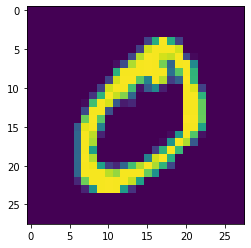

In [3]:
# Example of image, take the transpose to see it in the right orientation
example_image=np.reshape(x_train[0],(28,28))
plt.imshow(example_image.T)
plt.show()

In [4]:
# The number of epochs is a hyperparameter that defines the number times that the learning algorithm 
# will work through the entire training dataset.

# The batch size is a hyperparameter that defines the number of samples to work through before 
# updating the internal model parameters. 

# ref: https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

# define the size of each of the layers in the network
n_input_layer  = img_size
n_hidden_layer = 100
n_output_layer = N_class

# Add another hidden layer
n_hidden_layer_2 = 100 # number of neurons of the hidden layer. 0 deletes this layer

# eta is the learning rate
eta = 0.05

In [5]:
# Train the network
class Network:
    # Initialize a simple network
    # For W1 and W2 columns are the input and the rows are the output.
    # W1: Number of columns (input) needs to be equal to the number of features
    #     of the  MNIST digits, thus p. Number of rows (output) should be equal
    #     to the number of neurons of the hidden layer thus n_hidden_layer.
    # W2: Number of columns (input) needs to be equal to the number of neurons
    #     of the hidden layer. Number of rows (output) should be equal to the
    #     number of digits we wish to find (classification).
    def __init__(self, initialization="uniform", bias=False, hidden_layer_2=False):

        if initialization == "uniform":
            self.W1 = np.random.uniform(0, 1, (n_hidden_layer, n_input_layer))
            self.W2 = np.random.uniform(0, 1, (n_output_layer, n_hidden_layer))

            # The following normalises the random weights so that the sum of each row =1
            self.W1 = np.divide(self.W1, np.matlib.repmat(np.sum(self.W1, 1)[:, None], 1, n_input_layer))
            self.W2 = np.divide(self.W2, np.matlib.repmat(np.sum(self.W2, 1)[:, None], 1, n_hidden_layer))
            
            if hidden_layer_2:
                self.W2 = np.random.uniform(0, 1, (n_hidden_layer_2, n_hidden_layer))
                self.W3 = np.random.uniform(0, 1, (n_output_layer, n_hidden_layer_2))
                
                self.W2 = np.divide(self.W2, np.matlib.repmat(np.sum(self.W2, 1)[:, None], 1, n_hidden_layer))
                self.W3 = np.divide(self.W3, np.matlib.repmat(np.sum(self.W3, 1)[:, None], 1, n_hidden_layer_2))


        elif initialization == "xavier":
            # Xavier initialization
            self.W1 = np.random.normal(0, 1, (n_hidden_layer, n_input_layer))
            self.W2 = np.random.normal(0, 1, (n_output_layer, n_hidden_layer))

            self.W1 = self.W1 * np.sqrt(1/n_input_layer)
            self.W2 = self.W2 * np.sqrt(1/n_hidden_layer)
            
            if hidden_layer_2:
                self.W2 = np.random.normal(0, 1, (n_hidden_layer_2, n_hidden_layer))
                self.W3 = np.random.normal(0, 1, (n_output_layer, n_hidden_layer_2))
                
                self.W2 = self.W2 * np.sqrt(1/n_hidden_layer)
                self.W3 = self.W3 * np.sqrt(1/n_hidden_layer_2)

        # Initialize the biases
        self.bias_W1 = np.zeros((n_hidden_layer,))
        self.bias_W2 = np.zeros((n_output_layer,))
        
        if hidden_layer_2:
            self.bias_W2 = np.zeros((n_hidden_layer_2,))
            self.bias_W3 = np.zeros((n_output_layer,))

        # Initialise the gradients for each batch
        self.dW1 = np.zeros(self.W1.shape)
        self.dW2 = np.zeros(self.W2.shape)

        self.dbias_W1 = np.zeros(self.bias_W1.shape)
        self.dbias_W2 = np.zeros(self.bias_W2.shape)
        
        if hidden_layer_2:
            self.dW3 = np.zeros(self.W3.shape)
            self.dbias_W3 = np.zeros(self.bias_W3.shape)

        self.batch_size = 0
        self.hidden_layer_2 = hidden_layer_2
        self.bias = bias


    def forward(self, x_0):
        # Neural activation: input layer -> hidden layer
        h_1 = np.dot(self.W1,x_0)+self.bias_W1

        # Apply the sigmoid function
        x_1 = 1/(1+np.exp(-h_1))

        # Neural activation: hidden layer -> output layer
        h_2 = np.dot(self.W2,x_1)+self.bias_W2

        # Apply the sigmoid function
        x_2 = 1/(1+np.exp(-h_2))
        
        if self.hidden_layer_2:
            h_3 = np.dot(self.W3,x_2)+self.bias_W3
            x_3 = 1/(1+np.exp(-h_3))
            res = np.zeros(x_3.shape)
            res[np.argmax(x_3)] = 1
        
        else:
            x_3 = None
            res = np.zeros(x_2.shape)
            res[np.argmax(x_2)] = 1

        return x_1, x_2, x_3, res

    def backward(self, x_0, x_1, x_2, x_3, error):
        if self.hidden_layer_2:
            assert x_3 is not None
            delta_3 = x_3 * (1 - x_3) * error
            self.dW3 += np.outer(delta_3, x_2)
            self.dbias_W3 += delta_3
            
            delta_2 = x_2 * (1 - x_2) * np.dot(self.W3.T, delta_3)
        else:     
            assert x_3 is None
            # Backpropagation: output layer -> hidden layer
            delta_2 = x_2 * (1 - x_2) * error
            
        self.dW2 += np.outer(delta_2, x_1)
        self.dbias_W2 += delta_2

        # Backpropagation: hidden layer -> input layer
        delta_1 = x_1*(1-x_1) * np.dot(self.W2.T, delta_2)
        self.dW1 += np.outer(delta_1, x_0)
        self.dbias_W1 += delta_1

    def train(self, x_0, y):
        self.batch_size += 1

        x_1, x_2, x_3, _ = self.forward(x_0)

        # Compute the error signal
        if self.hidden_layer_2:
            error = y - x_3
        else:
            error = y - x_2

        self.backward(x_0, x_1, x_2, x_3, error)

        return 0.5 * np.sum(np.square(error))

    def step(self):
        # After each batch update the weights using accumulated gradients
        self.W1 += eta*self.dW1/self.batch_size
        self.W2 += eta*self.dW2/self.batch_size

        if self.bias:
            self.bias_W1 += eta*self.dbias_W1/self.batch_size
            self.bias_W2 += eta*self.dbias_W2/self.batch_size

        # Initialise the gradients for each batch
        self.dW1 = np.zeros(self.W1.shape)
        self.dW2 = np.zeros(self.W2.shape)       

        self.dbias_W1 = np.zeros(self.bias_W1.shape)
        self.dbias_W2 = np.zeros(self.bias_W2.shape)

        if self.hidden_layer_2:
            self.W3 += eta*self.dW3/self.batch_size
            if self.bias:
                self.bias_W3 += eta*self.dbias_W3/self.batch_size
            self.dW3 = np.zeros(self.W3.shape)
            self.dbias_W3 = np.zeros(self.bias_W3.shape)

        self.batch_size = 0


In [6]:
def train_network(_network, _batch_size=20, _n_epoch=5):
    # Keep track of the network inputs and average error per epoch
    _errors = np.zeros((_n_epoch,))

    n_batches = int(math.floor(n_samples/_batch_size))

    for epoch in range(0,_n_epoch):
        # We will shuffle the order of the samples each epoch
        shuffled_idxs = np.random.permutation(n_samples)

        for batch in range(0,n_batches):

            # Loop over all the samples in the batch
            for j in range(0,_batch_size):

                # Input (random element from the dataset)
                idx = shuffled_idxs[batch*_batch_size + j]
                x0 = x_train[idx]

                # Form the desired output, the correct neuron should have 1 the rest 0
                desired_output = y_train[idx]

                train_error = _network.train(x0, desired_output)

                # Store the error per epoch
                _errors[epoch] = _errors[epoch] + train_error/n_samples

            _network.step()

        print( "Epoch ", epoch+1, ": error = ", _errors[epoch])

    return _errors

In [7]:
network = Network()

errors = train_network(network)

Epoch  1 : error =  0.4530716168219974
Epoch  2 : error =  0.431429327907013
Epoch  3 : error =  0.3313213136401061
Epoch  4 : error =  0.23115876743424346
Epoch  5 : error =  0.1745563003253604


In [8]:
def plot_errors(_errors):
    plt.plot(_errors)
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('Average error per epoch')
    plt.show()

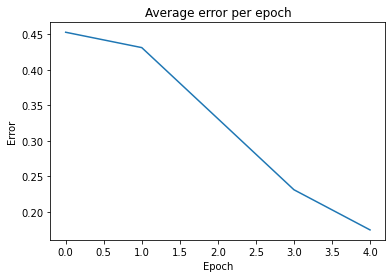

In [9]:
# Plot the performance
plot_errors(errors)

In [10]:
def calculate_accuracy(_network):
    correct = 0
    for x, y in zip(x_test, y_test):
        _, _, _, result = _network.forward(x)
        if np.all(np.equal(result, y)):
            correct += 1

    return correct / len(x_test)

In [11]:

# Exercise 1
accuracy = calculate_accuracy(network)
print(f"Accuracy: {accuracy}")

Accuracy: 0.862


Epoch  1 : error =  0.3451684497442059
Epoch  2 : error =  0.18885856514317487
Epoch  3 : error =  0.1398397982379764
Epoch  4 : error =  0.11811858856919394
Epoch  5 : error =  0.10603961763257687


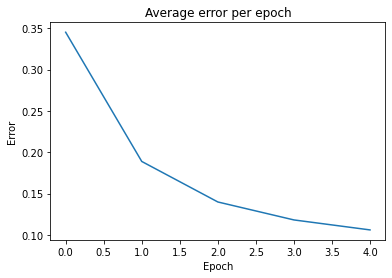

Accuracy: 0.899


In [12]:
# Exercise 2
xavier_network = Network(initialization="xavier")

errors = train_network(xavier_network)

plot_errors(errors)

accuracy = calculate_accuracy(xavier_network)
print(f"Accuracy: {accuracy}")

In [13]:
# Exercise 3
batch_sizes = np.array(np.floor(np.logspace(np.log10(1), np.log10(len(x_train)), 5)), dtype=int)

for n in batch_sizes:
    print("Batch size:", n)
    network = Network()

    start = time.time()
    train_network(network, _batch_size=n, _n_epoch=10)
    stop = time.time()

    runtime = stop - start
    accuracy = calculate_accuracy(network)
    print("Runtime:", runtime, "s")
    print("Accuracy:", accuracy)
    print()

Batch size: 1
Epoch  1 : error =  0.1541234369630991
Epoch  2 : error =  0.061183241792618574
Epoch  3 : error =  0.047679734636923835
Epoch  4 : error =  0.03960445528942606
Epoch  5 : error =  0.03435315114230225
Epoch  6 : error =  0.030480869001516774
Epoch  7 : error =  0.0274236341707311
Epoch  8 : error =  0.025102996035291935
Epoch  9 : error =  0.02318607438938589
Epoch  10 : error =  0.021442308646259158
Runtime: 325.4371807575226 s
Accuracy: 0.9718

Batch size: 15
Epoch  1 : error =  0.4516834260149959
Epoch  2 : error =  0.38476009432958425
Epoch  3 : error =  0.2453009916348754
Epoch  4 : error =  0.1697816444390184
Epoch  5 : error =  0.12971423402985693
Epoch  6 : error =  0.11000701568460396
Epoch  7 : error =  0.09890223880404131
Epoch  8 : error =  0.09147274918050877
Epoch  9 : error =  0.08595081593531936
Epoch  10 : error =  0.08157044710712044
Runtime: 169.71875023841858 s
Accuracy: 0.9171

Batch size: 244
Epoch  1 : error =  0.4889588709013724
Epoch  2 : error = 

In [16]:
# Exercise 4
bias_network = Network(initialization="xavier", bias=True)

train_network(bias_network, _n_epoch=10)

accuracy = calculate_accuracy(bias_network)
print(f"Accuracy: {accuracy}")

Epoch  1 : error =  0.34690650107457766
Epoch  2 : error =  0.19050770129412206
Epoch  3 : error =  0.13997116215201214
Epoch  4 : error =  0.1180076080437571
Epoch  5 : error =  0.10581425240141576
Epoch  6 : error =  0.09782288446623486
Epoch  7 : error =  0.09193022188293554
Epoch  8 : error =  0.08743666452480418
Epoch  9 : error =  0.08376030459091256
Epoch  10 : error =  0.0806392531692768
Accuracy: 0.9173


In [17]:
# Exercise 5
deep_network = Network(initialization="xavier", bias=True, hidden_layer_2=True)

train_network(deep_network, _n_epoch=10)

accuracy = calculate_accuracy(deep_network)
print(f"Accuracy: {accuracy}")

Epoch  1 : error =  0.44791739334924074
Epoch  2 : error =  0.41876080592012616
Epoch  3 : error =  0.3132169547525428
Epoch  4 : error =  0.23087756992787367
Epoch  5 : error =  0.17953715984024424
Epoch  6 : error =  0.14579840118201023
Epoch  7 : error =  0.12422317886633616
Epoch  8 : error =  0.1098002027596728
Epoch  9 : error =  0.10017638663314068
Epoch  10 : error =  0.09333281626054975
Accuracy: 0.9025
